In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df = pd.read_csv('/content/college_student_placement_dataset.csv')
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [ ]:
df.shape

(10000, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


In [ ]:
df.drop(['College_ID','Prev_Sem_Result','Academic_Performance','Internship_Experience','Extra_Curricular_Score','Communication_Skills','Projects_Completed'], axis = 1,inplace = True)

In [ ]:
df.head()

,IQ,CGPA,Placement
0,107,6.28,No
1,97,5.37,No
2,109,5.83,No
3,122,5.75,No
4,96,7.69,No


In [ ]:
df.head()

,IQ,CGPA,Placement
0,107,6.28,No
1,97,5.37,No
2,109,5.83,No
3,122,5.75,No
4,96,7.69,No


In [ ]:
import matplotlib.pyplot as plt


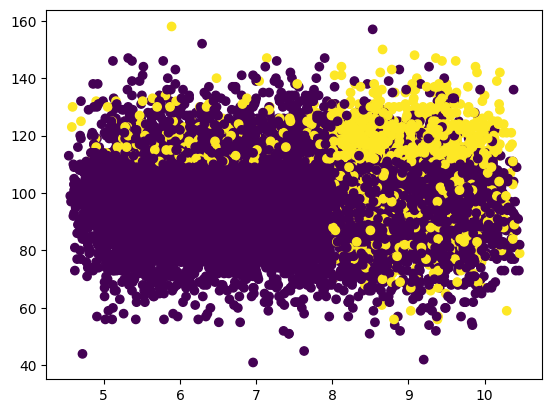

In [ ]:
df['Placement'] = df['Placement'].map({'No': 0, 'Yes': 1})
plt.scatter(df['CGPA'],df['IQ'], c=df['Placement'])

In [ ]:
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [ ]:
X

,IQ,CGPA
0,107,6.28
1,97,5.37
2,109,5.83
3,122,5.75
4,96,7.69
...,...,...
9995,119,8.29
9996,70,9.34
9997,89,6.25
9998,107,8.92


In [ ]:
Y

,Placement
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,0
9997,0
9998,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1)

In [ ]:
Y.shape

(10000,)

In [ ]:
X_train

,IQ,CGPA
3772,88,7.38
1095,98,9.63
2329,112,5.68
7144,104,9.85
3021,93,9.39
...,...,...
5554,99,9.06
5225,83,7.97
1979,106,7.67
8920,125,8.07


In [ ]:
Y_train

,Placement
3772,0
1095,0
2329,0
7144,0
3021,0
...,...
5554,0
5225,0
1979,0
8920,0


In [ ]:
X_test

,IQ,CGPA
3823,102,5.71
9698,118,8.02
7864,93,6.87
7128,102,9.15
5214,105,7.85
...,...,...
6056,101,5.02
6060,100,5.94
6575,117,8.24
9274,90,8.64


In [ ]:
Y_test

,Placement
3823,0
9698,1
7864,0
7128,0
5214,0
...,...
6056,0
6060,0
6575,1
9274,0


In [ ]:
Y_train

,Placement
3772,0
1095,0
2329,0
7144,0
3021,0
...,...
5554,0
5225,0
1979,0
8920,0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_train

array([[-0.76374869, -0.10708754],
       [-0.09681635,  1.42409545],
       [ 0.83688894, -1.26398135],
       ...,
       [ 0.43672953,  0.09026494],
       [ 1.70390098,  0.36247525],
       [ 0.70350247,  1.56700586]])

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
X_test

array([[ 0.16995659, -1.24356558],
       [ 1.23704834,  0.32844896],
       [-0.43028252, -0.45415568],
       ...,
       [ 1.17035511,  0.47816463],
       [-0.63036222,  0.75037494],
       [-0.49697575, -0.28402424]])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression()

In [ ]:
# model taining
clf.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
Y_pred = clf.predict(X_test)

In [ ]:
Y_test

,Placement
3823,0
9698,1
7864,0
7128,0
5214,0
...,...
6056,0
6060,0
6575,1
9274,0


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(Y_test,Y_pred)

0.851

In [ ]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

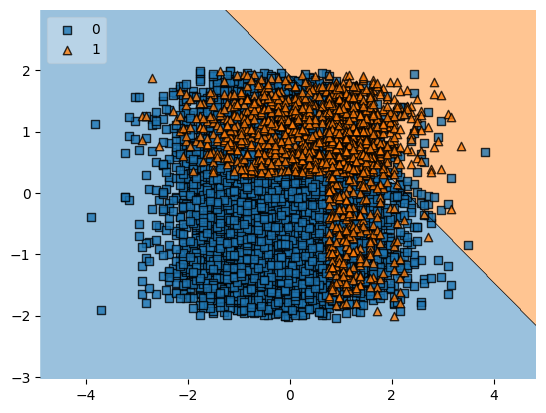

In [ ]:
plot_decision_regions(X_train, Y_train.values, clf=clf, legend=2)

In [ ]:
import pickle

In [ ]:
pickle.dump(clf,open('model.pkl','wb'))